# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   https://www.kaggle.com/datasets/onydrive/diets-nutrition-dataset
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [486]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from itertools import product
import numpy as np
from collections import Counter

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [487]:
df = pd.read_csv('/content/All_Diets.csv')
df

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09
...,...,...,...,...,...,...,...,...
7801,dash,Brown Butter-Sunchoke Soup With Brussels Sprou...,italian,85.20,288.14,137.15,2022-10-16,20:40:44
7802,dash,Make-Your-Own-Salad,american,141.98,123.18,323.50,2022-10-16,20:40:44
7803,dash,Luis Buñuel Dry Martini,world,0.01,0.39,0.00,2022-10-16,20:40:44
7804,dash,Cornflake Semi-Fried Chicken Tenders,american,155.38,239.88,260.84,2022-10-16,20:40:44


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [488]:
# Memahami struktur data
df.head()


,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09


In [489]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7806 entries, 0 to 7805
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Diet_type        7806 non-null   object 
 1   Recipe_name      7806 non-null   object 
 2   Cuisine_type     7806 non-null   object 
 3   Protein(g)       7806 non-null   float64
 4   Carbs(g)         7806 non-null   float64
 5   Fat(g)           7806 non-null   float64
 6   Extraction_day   7806 non-null   object 
 7   Extraction_time  7806 non-null   object 
dtypes: float64(3), object(5)
memory usage: 488.0+ KB


In [490]:
print(f"Jumlah kolom dataset: {df.columns.size} kolom.")
print(f"Jumlah baris dataset: {df.index.size} baris.")

Jumlah kolom dataset: 8 kolom.
Jumlah baris dataset: 7806 baris.


In [491]:
# Menangani Data yang Hilang
print(df.isnull().sum())

Diet_type          0
Recipe_name        0
Cuisine_type       0
Protein(g)         0
Carbs(g)           0
Fat(g)             0
Extraction_day     0
Extraction_time    0
dtype: int64


In [492]:
df.dropna(inplace=True)
print(df.isnull().sum())

Diet_type          0
Recipe_name        0
Cuisine_type       0
Protein(g)         0
Carbs(g)           0
Fat(g)             0
Extraction_day     0
Extraction_time    0
dtype: int64


In [493]:
# Analisis Distribusi dan Korelasi
df.describe()

,Protein(g),Carbs(g),Fat(g)
count,7806.000000,7806.000000,7806.000000
mean,83.231498,152.123189,117.328542
std,89.797282,185.907322,122.098117
min,0.000000,0.060000,0.000000
25%,24.415000,36.162500,41.067500
50%,56.280000,93.415000,84.865000
75%,112.357500,205.915000,158.290000
max,1273.610000,3405.550000,1930.240000


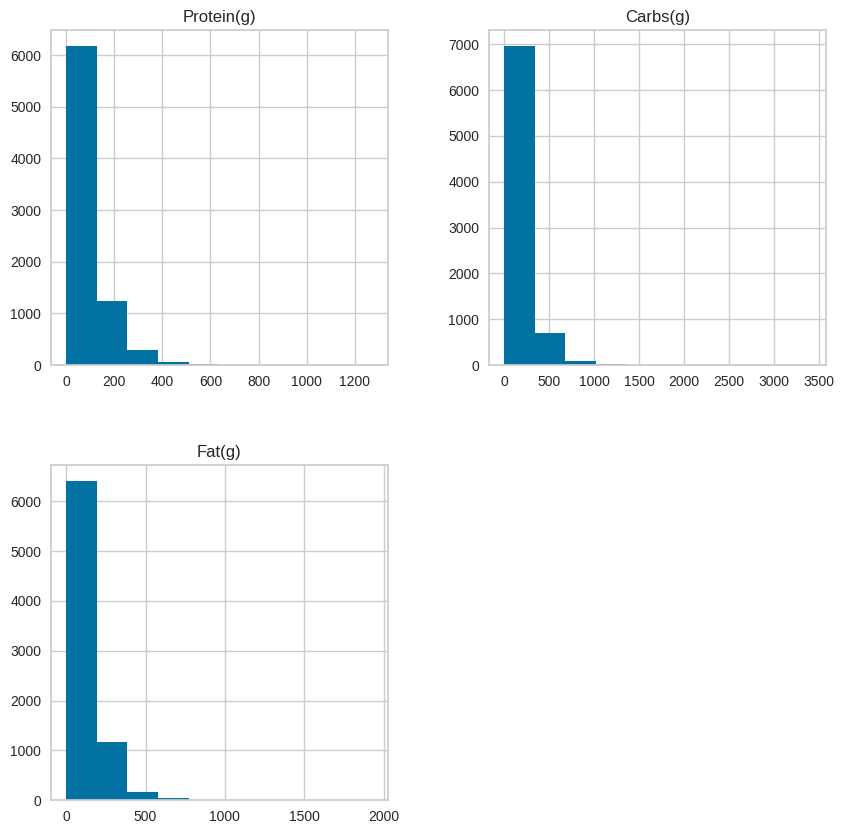

In [494]:
df.hist(figsize=(10, 10))
plt.show()

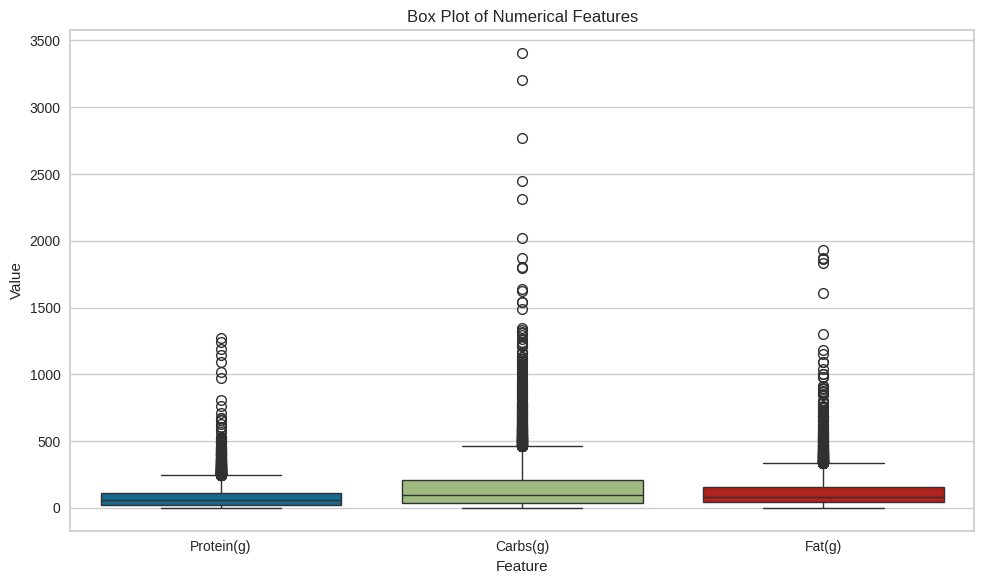

In [495]:
axes = plt.subplots(1, figsize=(10, 6))
sns.boxplot(data=df[['Protein(g)', 'Carbs(g)', 'Fat(g)']], ax=axes[1])
axes[1].set_title('Box Plot of Numerical Features')
axes[1].set_xlabel('Feature')
axes[1].set_ylabel('Value')

plt.tight_layout()
plt.show()

In [496]:
correlation_matrix = df.corr(numeric_only=True)

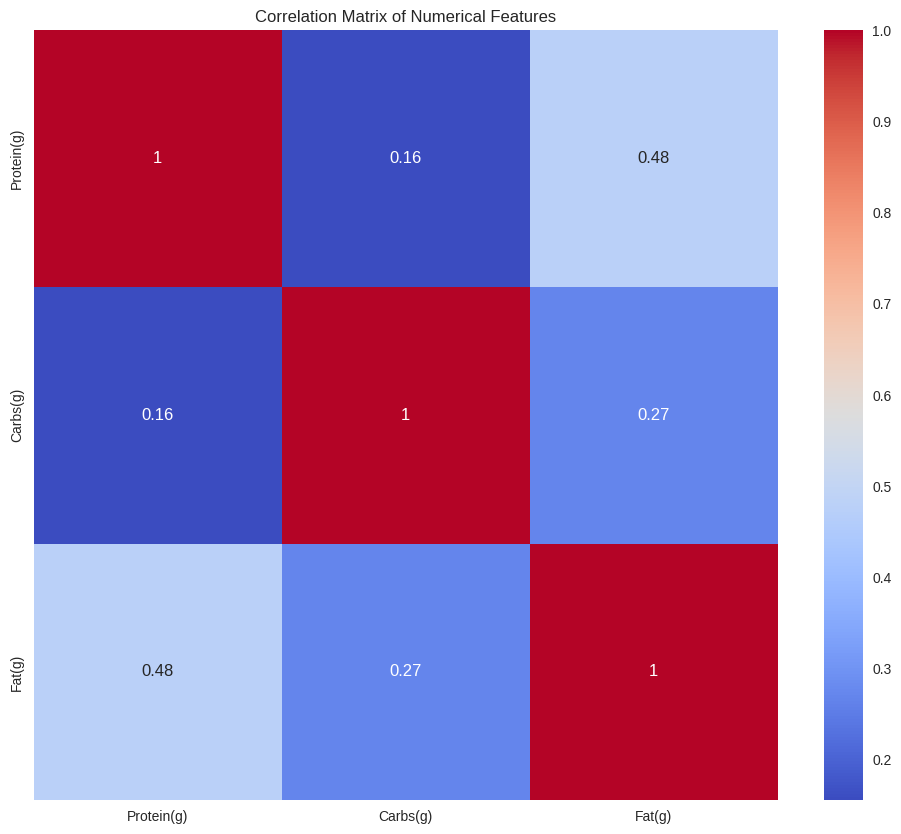

In [497]:
# Visualisasi Data
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

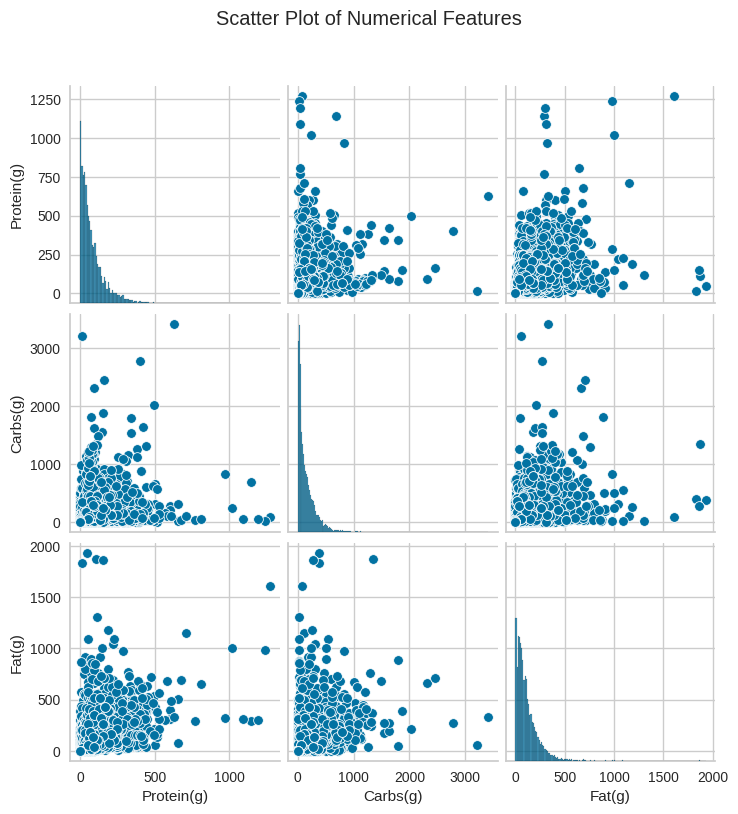

In [498]:

g = sns.pairplot(df[['Protein(g)', 'Carbs(g)', 'Fat(g)']])
g.fig.suptitle('Scatter Plot of Numerical Features', y=1.08)
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [499]:

df = df.drop(columns=['Recipe_name','Extraction_day', 'Extraction_time'])

df

,Diet_type,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,paleo,american,5.22,1.29,3.20
1,paleo,south east asian,181.55,28.62,146.14
2,paleo,american,30.91,302.59,96.76
3,paleo,mexican,9.62,75.78,59.89
4,paleo,chinese,39.84,54.08,71.55
...,...,...,...,...,...
7801,dash,italian,85.20,288.14,137.15
7802,dash,american,141.98,123.18,323.50
7803,dash,world,0.01,0.39,0.00
7804,dash,american,155.38,239.88,260.84


In [500]:
# Normalisasi data kategorikal
label_encoder = LabelEncoder()
df['Diet_type'] = label_encoder.fit_transform(df['Diet_type'])
df['Cuisine_type'] = label_encoder.fit_transform(df['Cuisine_type'])

In [501]:
# Normalisasi data numerikal
features_to_scale = ['Protein(g)', 'Carbs(g)', 'Fat(g)']
scaler = StandardScaler()

df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

df.head()

,Diet_type,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,3,0,-0.868807,-0.811387,-0.934788
1,3,17,1.094964,-0.664369,0.235985
2,3,0,-0.582700,0.809416,-0.168470
3,3,13,-0.819804,-0.410678,-0.470460
4,3,5,-0.483247,-0.527410,-0.374956


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [502]:
# Menggunakan DBSCAN untuk menghilangkan noise points
dbscan = DBSCAN(eps=0.3, min_samples=5)
clusters = dbscan.fit_predict(df)

In [503]:
mask = clusters != -1
df_cleaned = df[mask]
clusters_cleaned = clusters[mask]

In [504]:
# K means pada data yang sudah dibersihkan
kmeans = KMeans(n_clusters=3, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(df_cleaned)

df.head()

<ipython-input-504-1755bfecb3ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Cluster'] = kmeans.fit_predict(df_cleaned)


,Diet_type,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,3,0,-0.868807,-0.811387,-0.934788
1,3,17,1.094964,-0.664369,0.235985
2,3,0,-0.582700,0.809416,-0.168470
3,3,13,-0.819804,-0.410678,-0.470460
4,3,5,-0.483247,-0.527410,-0.374956


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [505]:
silhouette_avg = silhouette_score(df_cleaned, df_cleaned['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.6168102594848586


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [506]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

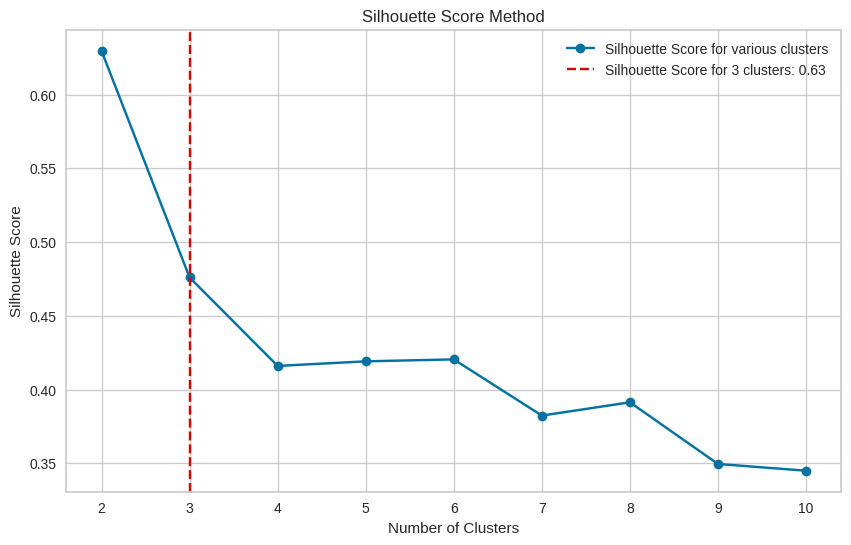

In [507]:

silhouette_scores = []
cluster_range = range(2, 11)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', label='Silhouette Score for various clusters')
plt.axvline(x=3, color='r', linestyle='--', label=f"Silhouette Score for 3 clusters: {silhouette_scores[0]:.2f}")
plt.title('Silhouette Score Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.legend()
plt.show()

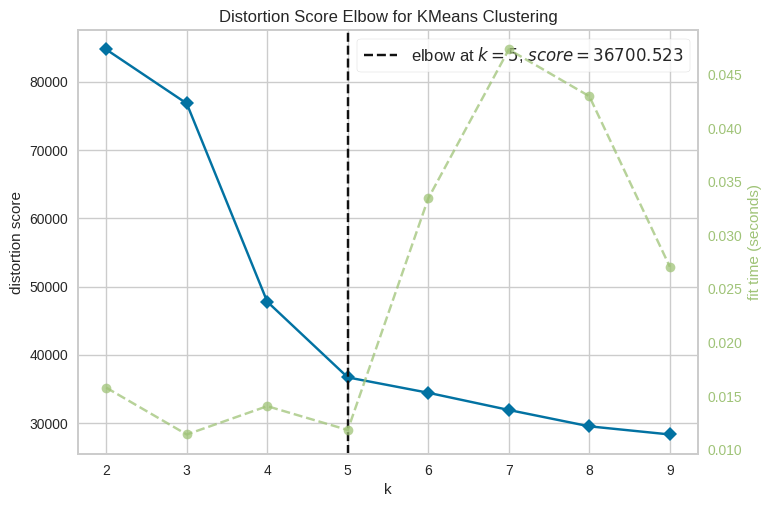

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [508]:

visualizer = KElbowVisualizer(kmeans, k=(2,10))
visualizer.fit(df)
visualizer.show()

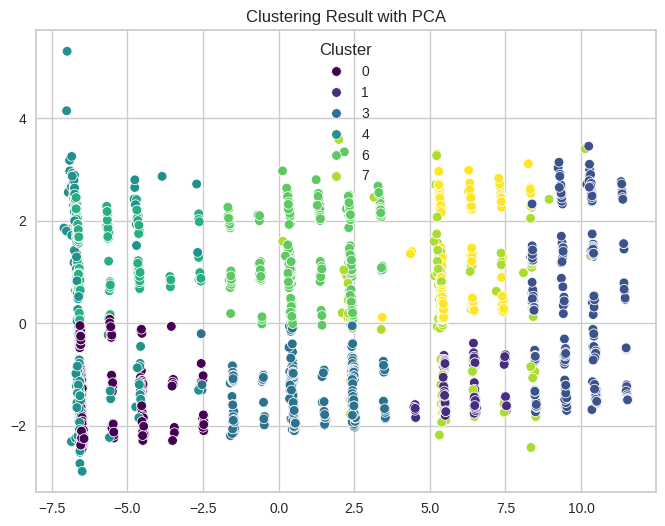

In [509]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Predict clusters for the entire DataFrame 'df'
df['Cluster'] = kmeans.fit_predict(df) # This line adds the 'Cluster' column to 'df'

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=df['Cluster'], palette='viridis')
plt.title('Clustering Result with PCA')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [510]:
# Denormalisasi data kategorikal
df['Diet_type'] = label_encoder.inverse_transform(df['Diet_type'])
df['Cuisine_type'] = label_encoder.inverse_transform(df['Cuisine_type'])

# Denormalisasi data numerikal
for feature in features_to_scale:
    df[feature] = df[feature] * scaler.scale_[features_to_scale.index(feature)] + scaler.mean_[features_to_scale.index(feature)]


In [513]:
# Mengelompokkan data berdasarkan cluster dan menganalisis karakteristik rata-rata dari setiap cluster

cluster_summary = df.groupby('Cluster')[['Protein(g)', 'Carbs(g)', 'Fat(g)']].mean()

print("Summary of Average Features per Cluster:")
print(cluster_summary)

Summary of Average Features per Cluster:
         Protein(g)    Carbs(g)      Fat(g)
Cluster                                    
0         77.761340   99.751663  119.833333
1         67.729146   85.905327   90.425151
2         52.000446   89.657708   62.747307
3         96.748131  107.913979  131.119748
4        180.595224  571.684403  384.115261
5         61.876766  186.241295  100.995621
6         77.594172  170.326711  108.006445
7        298.097355  282.444463  333.149380
8         71.740827  135.005092   77.091959


Tulis hasil interpretasinya di sini.


### **1. Cluster 0:**
**Karakteristik Asupan Makronutrien:**
- **Protein:** Rata-rata asupan protein sebesar 77.76 g, mencerminkan konsumsi protein yang moderat.  
- **Carbs (Karbohidrat):** Asupan karbohidrat rata-rata 99.75 g, berada pada tingkat sedang.  
- **Fat (Lemak):** Rata-rata asupan lemak cukup tinggi, yaitu 119.83 g.  

**Interpretasi:**  
Cluster ini kemungkinan mencerminkan individu dengan pola makan tinggi lemak dan moderat dalam protein serta karbohidrat. Hal ini dapat berkorelasi dengan karakteristik metabolik yang lebih stabil dan kebutuhan energi yang tinggi, terutama untuk individu muda dan aktif.

---

### **2. Cluster 1:**
**Karakteristik Asupan Makronutrien:**
- **Protein:** Rata-rata asupan protein 67.73 g, sedikit lebih rendah dibanding Cluster 0.  
- **Carbs (Karbohidrat):** Rata-rata asupan karbohidrat sebesar 85.91 g, lebih rendah dari Cluster 0.  
- **Fat (Lemak):** Asupan lemak rata-rata 90.43 g, lebih rendah dibandingkan Cluster 0.  

**Interpretasi:**  
Cluster ini mencerminkan individu dengan pola makan rendah protein, karbohidrat, dan lemak dibanding Cluster 0. Mungkin berkaitan dengan kelompok yang lebih kurus dan masih memiliki kontrol metabolik baik.

---

### **3. Cluster 2:**
**Karakteristik Asupan Makronutrien:**
- **Protein:** Asupan protein paling rendah di antara semua cluster, yaitu 52.00 g.  
- **Carbs (Karbohidrat):** Rata-rata karbohidrat 89.66 g, sedikit lebih tinggi dibanding Cluster 1.  
- **Fat (Lemak):** Rata-rata asupan lemak terendah, yaitu 62.75 g.  

**Interpretasi:**  
Cluster ini menggambarkan pola makan yang rendah dalam semua makronutrien, berpotensi mencerminkan kelompok yang kurus dengan kebutuhan energi rendah. Hal ini mungkin terkait dengan individu yang lebih tua atau kurang aktif secara fisik.

---

### **4. Cluster 3:**
**Karakteristik Asupan Makronutrien:**
- **Protein:** Rata-rata asupan protein tertinggi di antara semua cluster, yaitu 96.75 g.  
- **Carbs (Karbohidrat):** Karbohidrat juga paling tinggi, yaitu 107.91 g.  
- **Fat (Lemak):** Asupan lemak tertinggi, sebesar 131.12 g.  

**Interpretasi:**  
Cluster ini mencerminkan individu dengan pola makan tinggi protein, karbohidrat, dan lemak. Mungkin menggambarkan kelompok dengan risiko metabolik lebih tinggi akibat konsumsi makronutrien yang tinggi, yang sesuai dengan karakteristik metabolik cluster ini. Intervensi berupa pola makan seimbang dan pengurangan asupan lemak mungkin diperlukan.

---

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [514]:
df.to_csv('hasil_clustering.csv', index=False)